In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style='darkgrid')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('mall_customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Univariate Analysis

In [8]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.495000
std,57.879185,13.969007,26.264721,25.823522,1.173396
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,3.000000


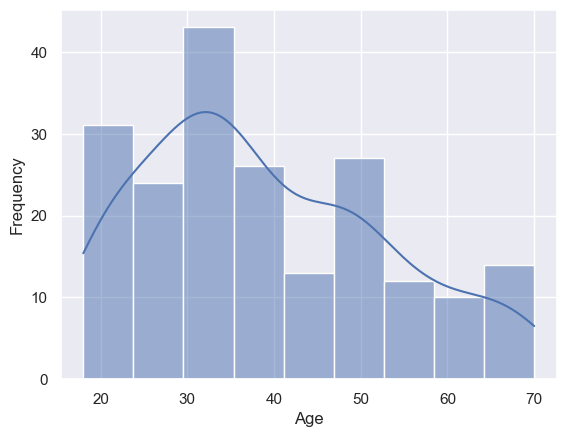

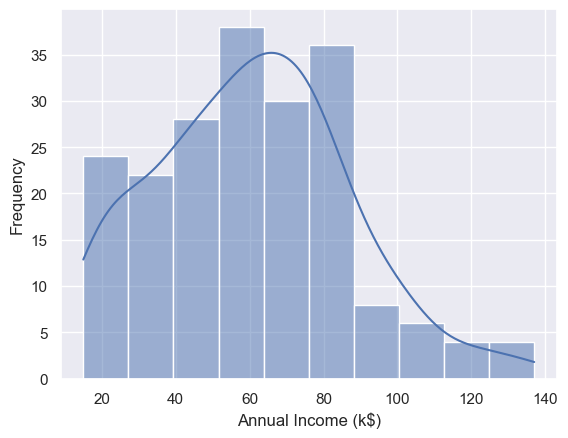

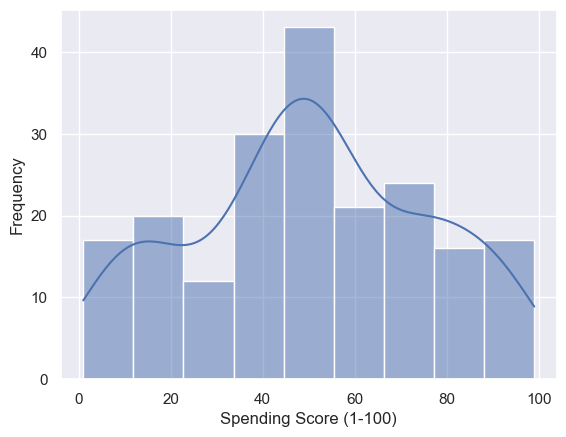

In [36]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col1 in columns:
    plt.figure()
    sns.histplot(df1[col1], kde=True)
    plt.xlabel(f'{col1}')
    plt.ylabel('Frequency')

plt.show()

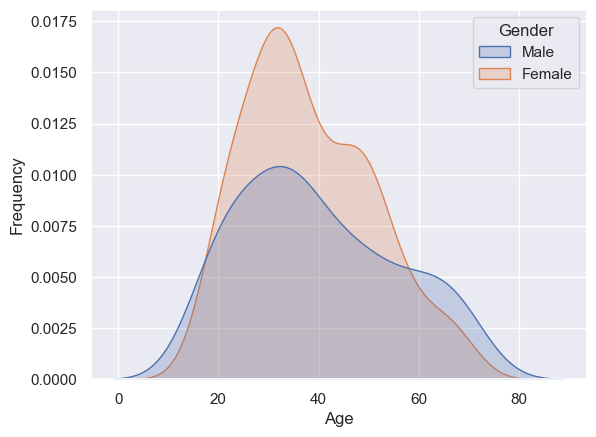

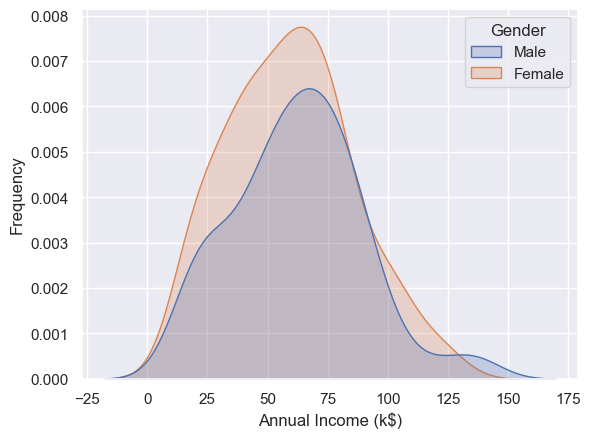

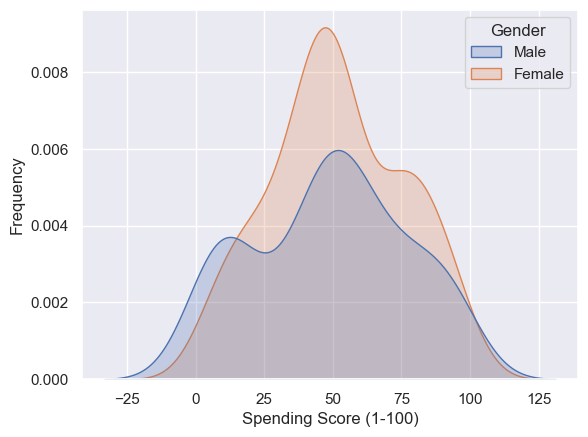

In [44]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col2 in columns:
    melted_df = df1.melt(id_vars='Gender', value_vars=[col2]) # reshaping 
    plt.figure()
    sns.kdeplot(data=melted_df, x='value', hue='Gender', shade=True)
    plt.xlabel(f'{col2}')
    plt.ylabel('Frequency')

plt.show()

#### Preparing the dataset

In [3]:
df2 = df1.drop(['CustomerID'], axis=1)
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df2 = pd.get_dummies(df2, drop_first=True)
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [5]:
scale = StandardScaler()
df2 = scale.fit_transform(df2)
df2

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [6]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(df2)

KMeans(n_clusters=4, random_state=123)

In [7]:
df1['Cluster'] = model.predict(df2)
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
